IMPORTING THE LIBRARIES

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Matplotlib configuration
import matplotlib
matplotlib.use('Agg')  # Ensuring no GUI issues for matplotlib

import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # In case only plt is used

import seaborn as sns

# Ensure inline plotting for notebooks
%matplotlib inline

# Set style for seaborn plots
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

DATA LOADING

In [3]:
path="Teen_Addiction_Risk_Dataset.csv"

try:
    df = pd.read_csv(path, encoding='ascii', delimiter=',')
    print('Data loaded successfully.')
except Exception as e:
    print(f'Error loading data: {e}')

df.head()


Data loaded successfully.


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


DATA CLEANING AND PREPROCESSING

In [4]:
print('Missing values in each column:\n', df.isnull().sum())

initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f'Removed {initial_shape[0] - df.shape[0]} duplicate rows.')

categorical_cols = ['Name', 'Gender', 'Location', 'School_Grade', 'Phone_Usage_Purpose']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

df.info()

Missing values in each column:
 ID                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64
Removed 0 duplicate rows.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID       

EXPLORATORY DATA ANALYSIS


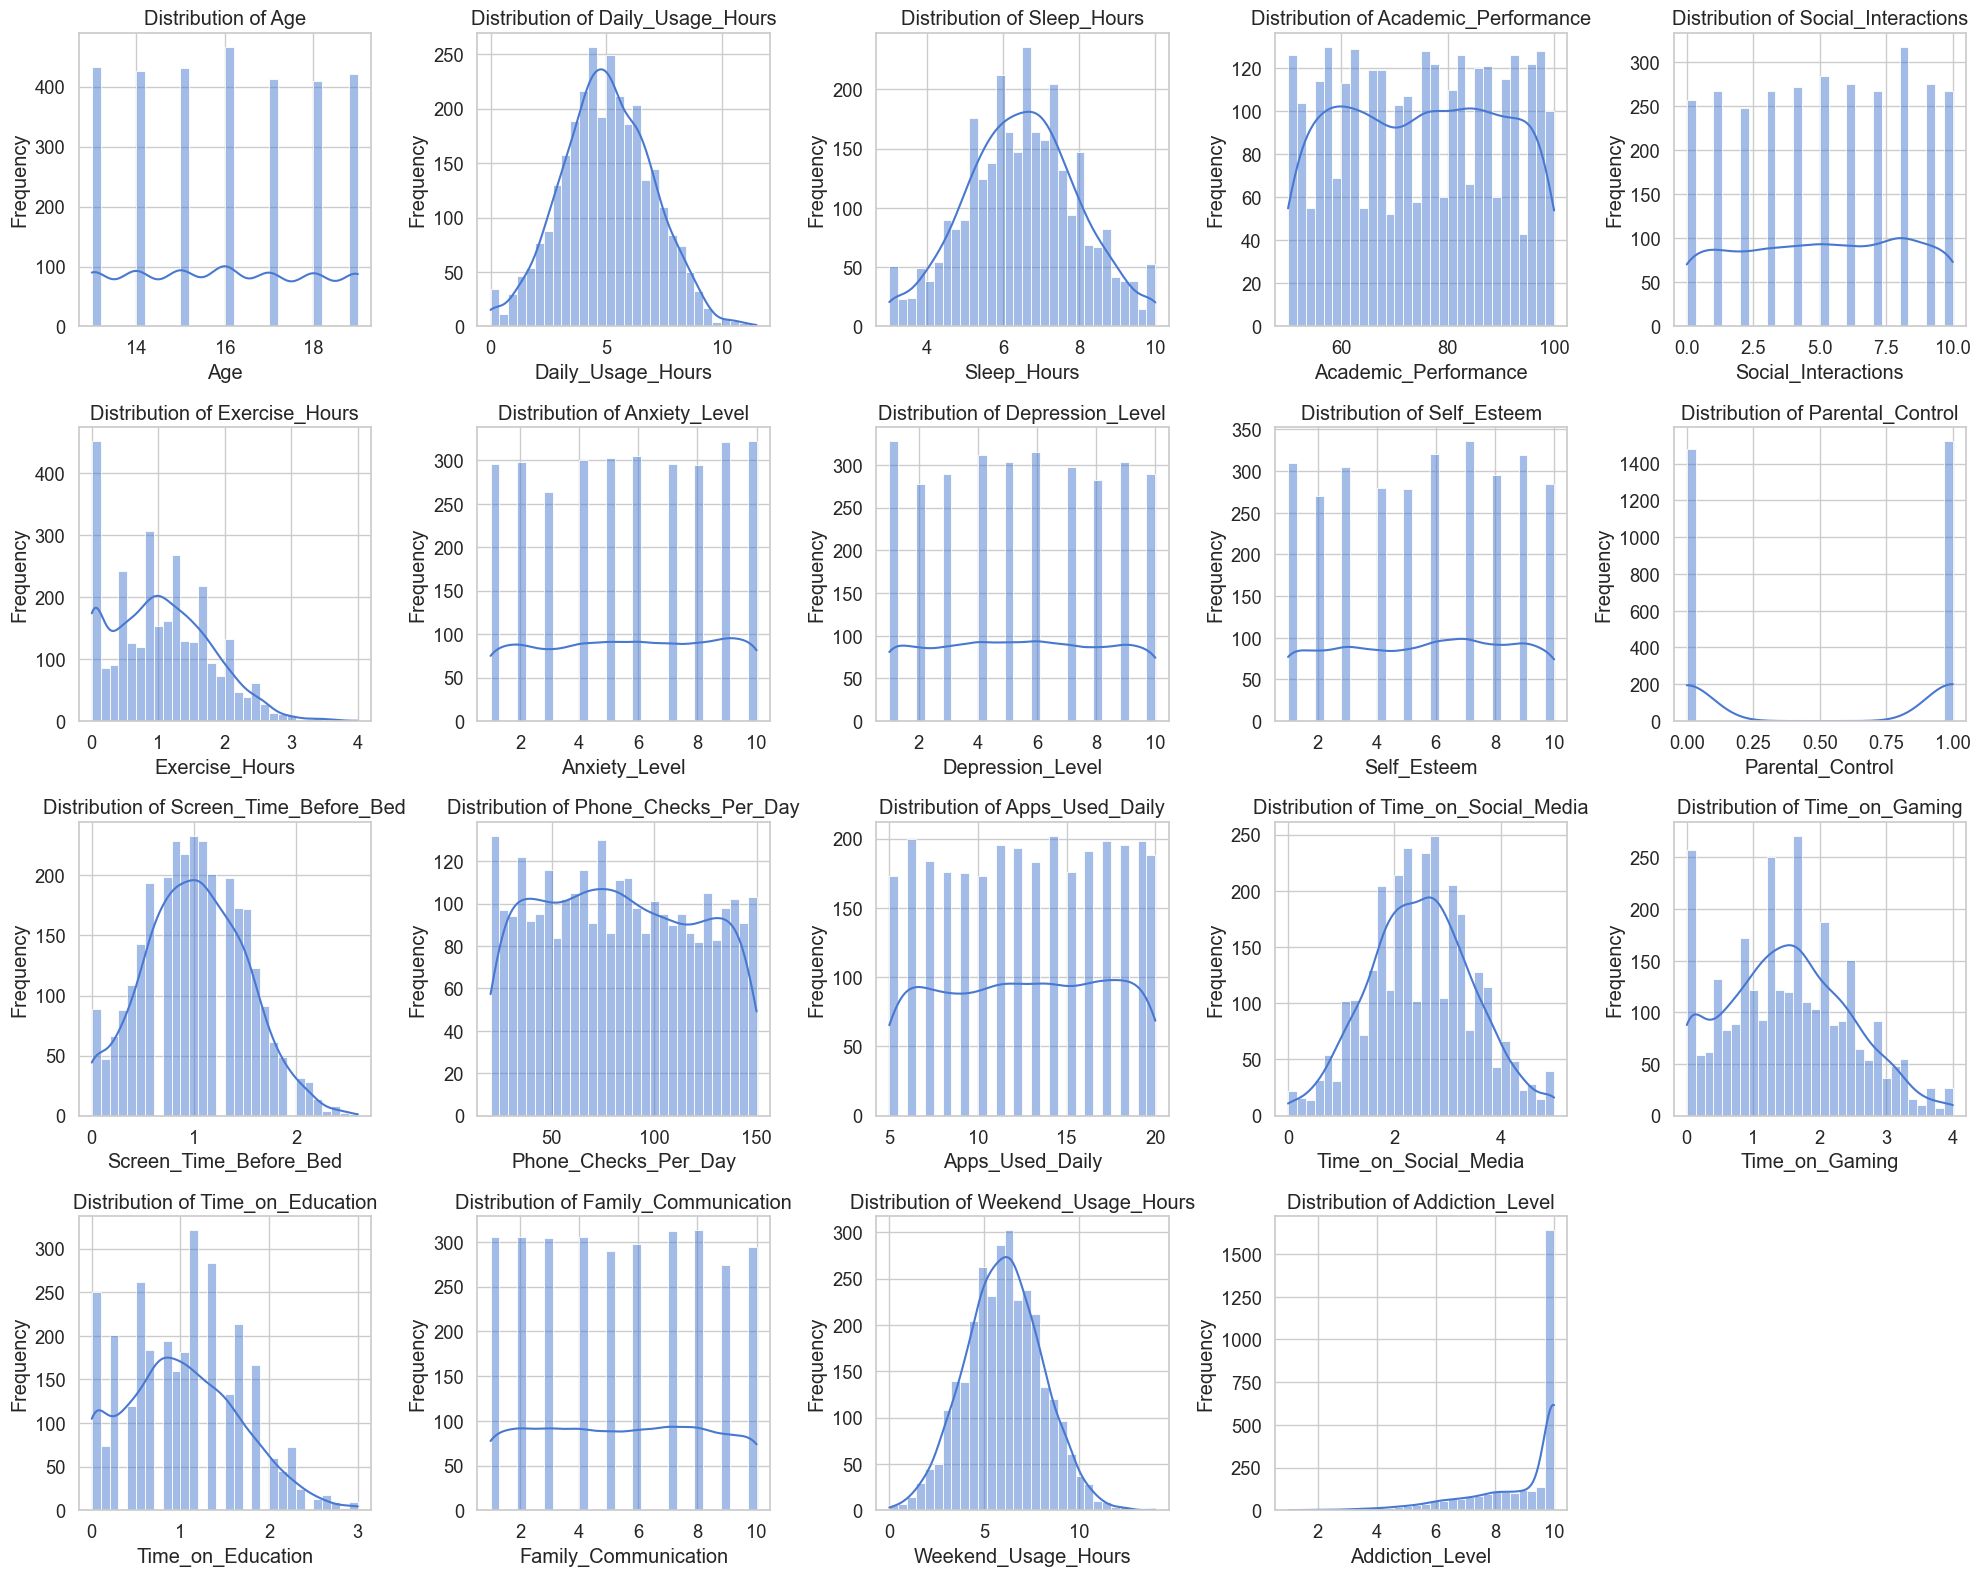

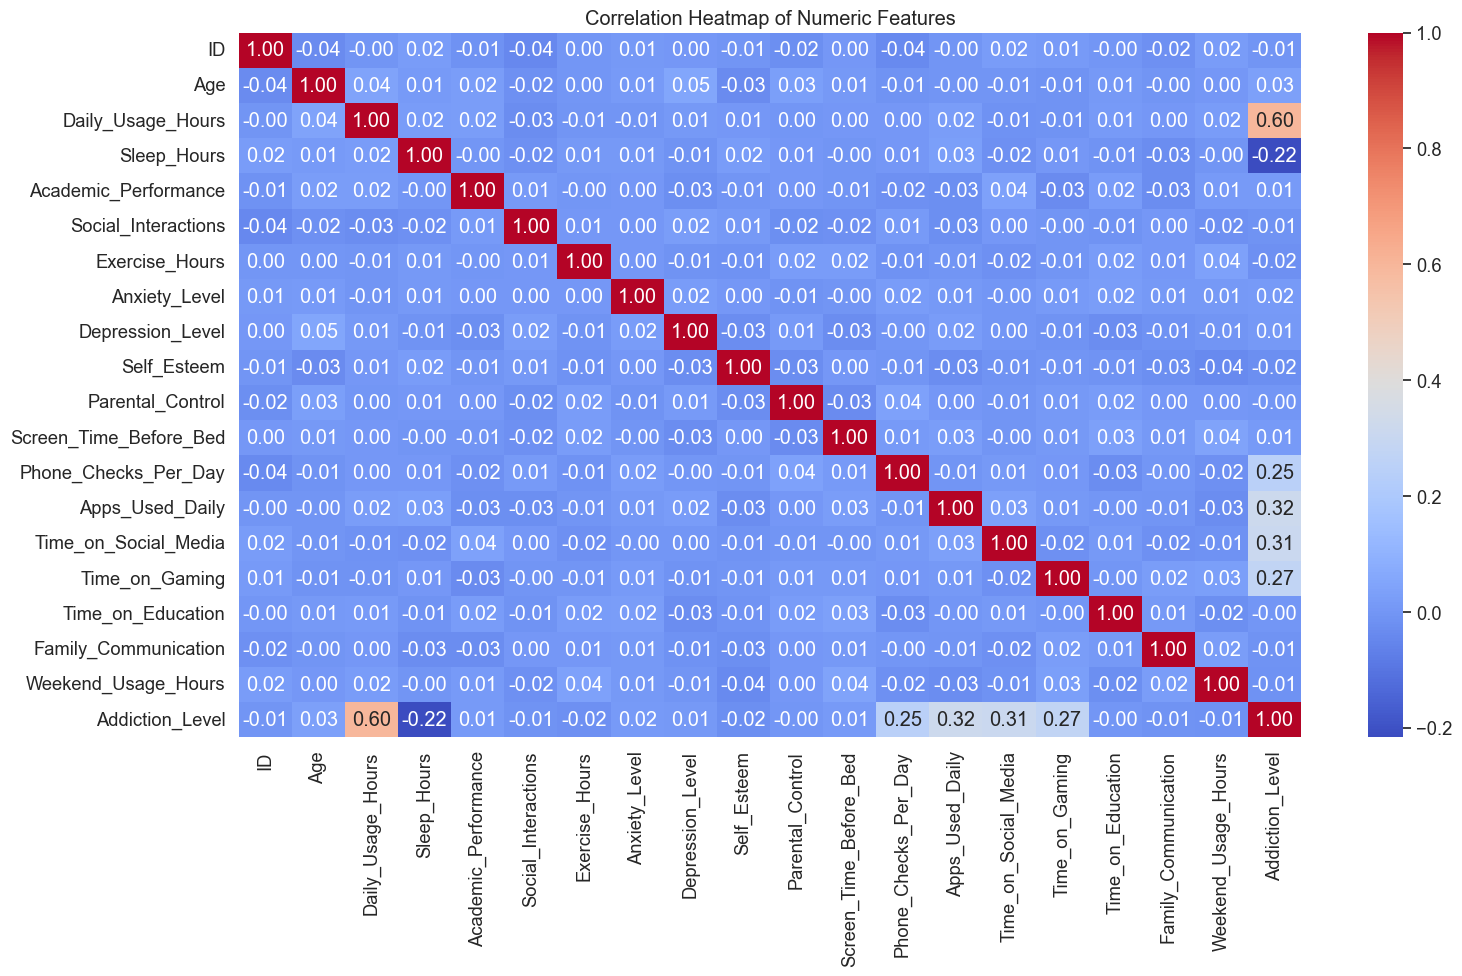

<Figure size 1600x1000 with 0 Axes>

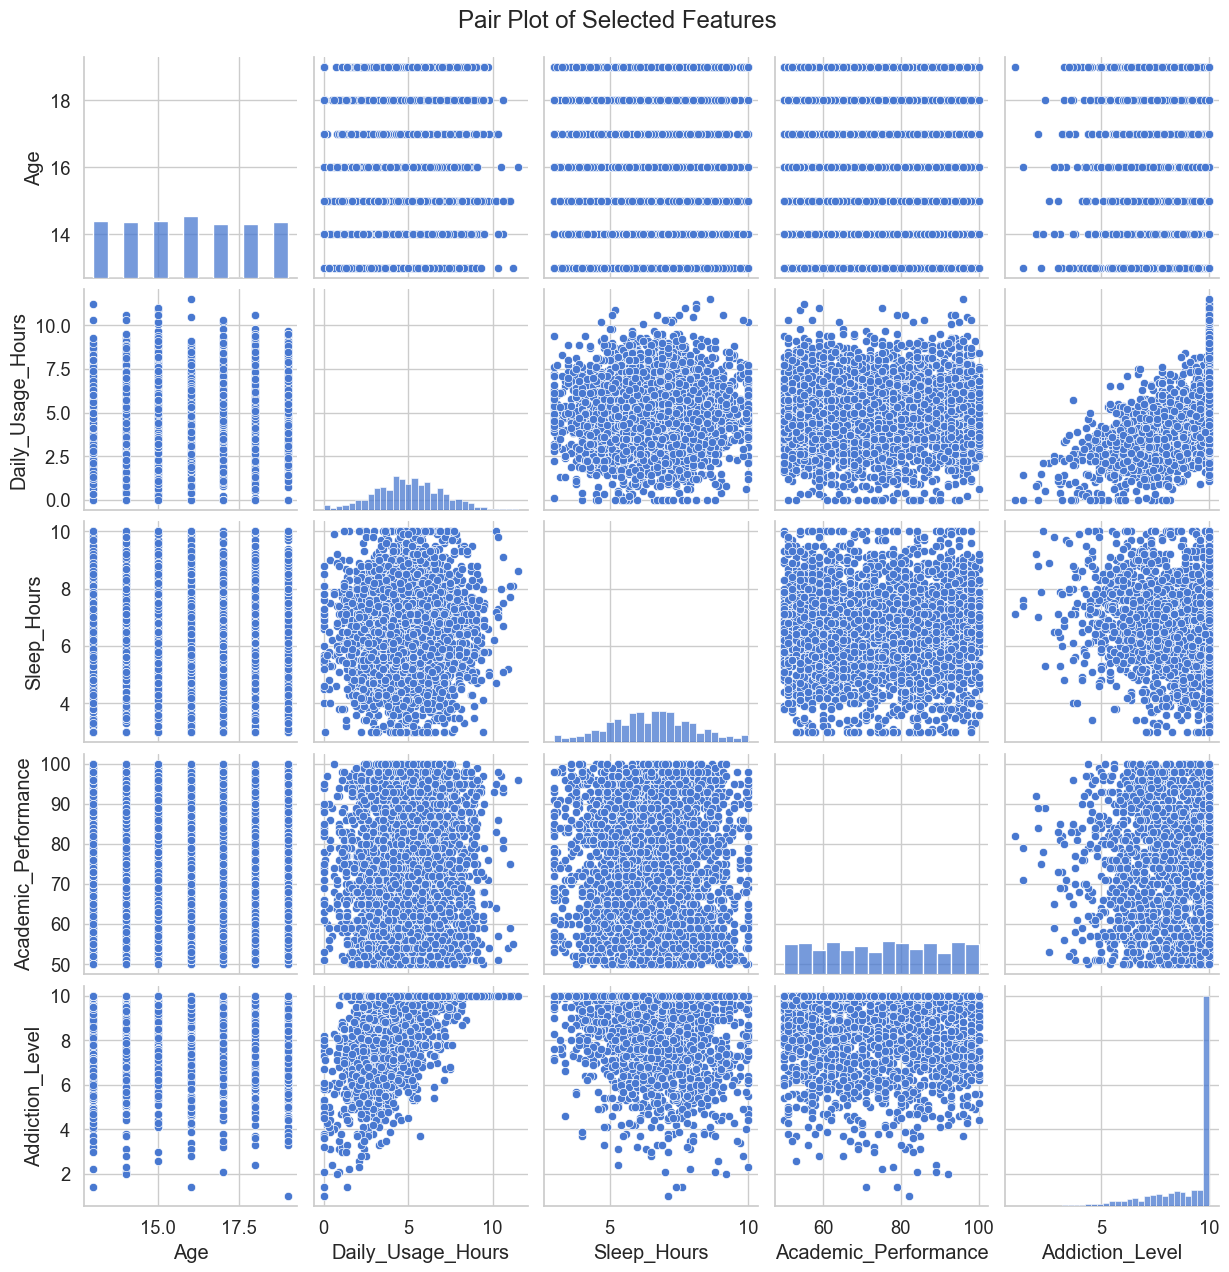

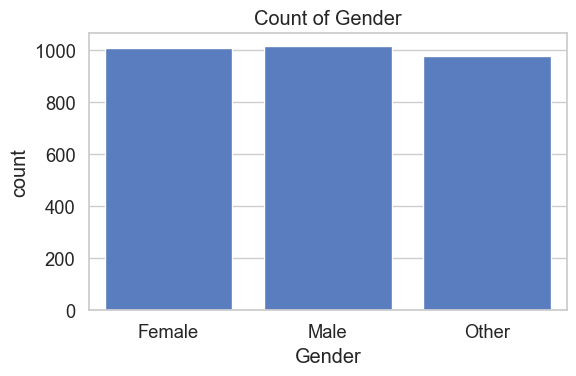

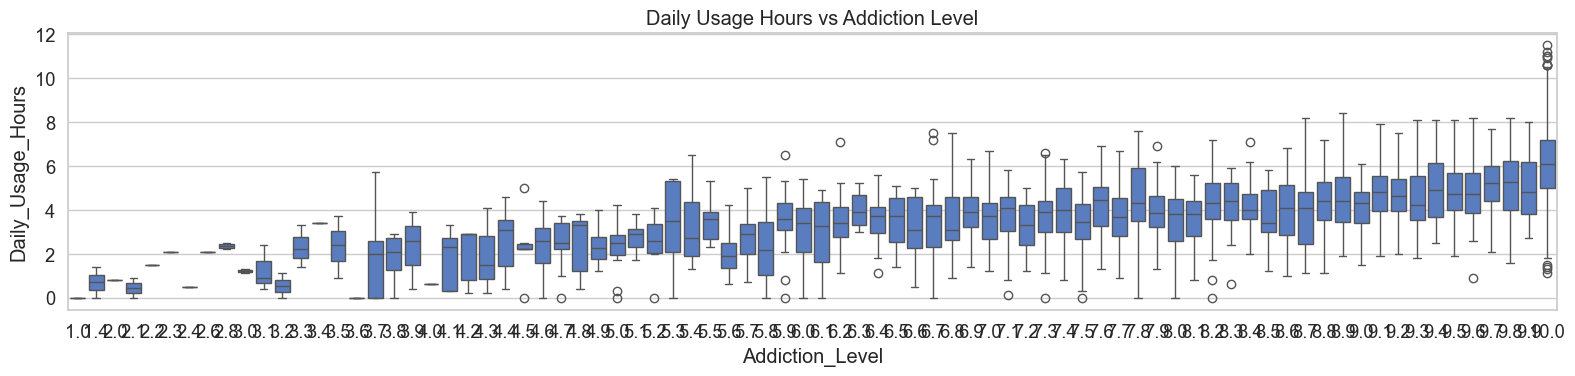

In [6]:
num_cols = ['Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 
            'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level',
            'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day',
            'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
            'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level']

cols_to_plot = [col for col in num_cols if col in df.columns][:20]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
axes = axes.flatten()  

for i, col in enumerate(cols_to_plot):
    sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(len(cols_to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(16, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

# Pair Plot
selected_cols = ['Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Addiction_Level']
plt.figure(figsize=(16,10))

sns.pairplot(df[selected_cols].dropna())
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# Countplot for Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Count of Gender')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,4))
sns.boxplot(x='Addiction_Level', y='Daily_Usage_Hours', data=df)
plt.title('Daily Usage Hours vs Addiction Level')
plt.tight_layout()
plt.show()

FEATURE ENGINEERING


Lifestyle_Score feature created.


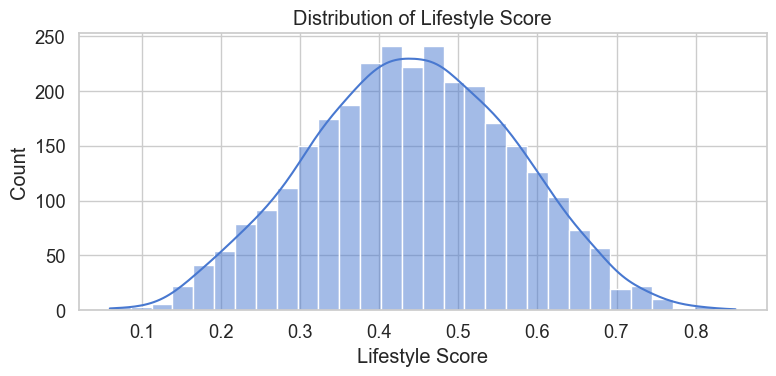

In [7]:
if set(['Academic_Performance', 'Sleep_Hours', 'Social_Interactions', 'Exercise_Hours']).issubset(df.columns):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    features = ['Academic_Performance', 'Sleep_Hours', 'Social_Interactions', 'Exercise_Hours']
    df['Lifestyle_Score'] = scaler.fit_transform(df[features]).mean(axis=1)
    print('Lifestyle_Score feature created.')
else:
    print('Required columns for creating Lifestyle_Score are missing.')

plt.figure(figsize=(8,4))
sns.histplot(df['Lifestyle_Score'].dropna(), kde=True, bins=30)
plt.title('Distribution of Lifestyle Score')
plt.xlabel('Lifestyle Score')
plt.tight_layout()
plt.show()

PREDICTIVE MODELING


R² Score: 0.859


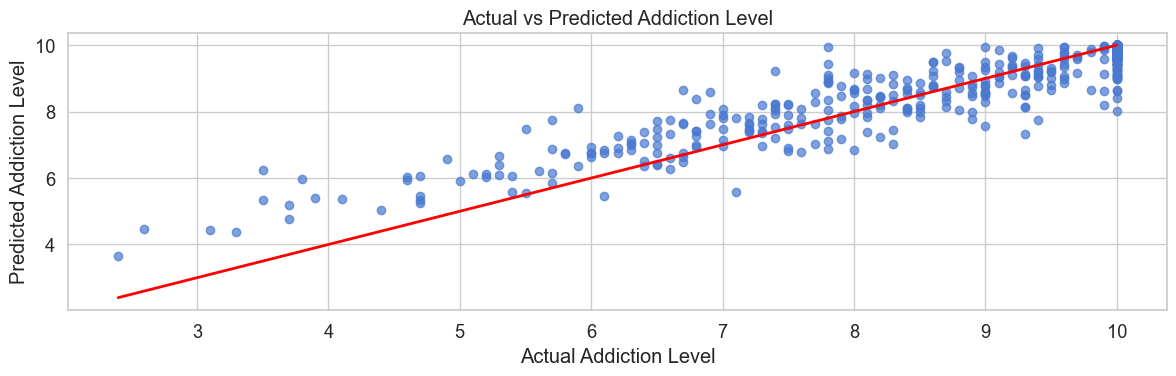

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

drop_cols = ['ID', 'Name']
data = df.drop(columns=drop_cols, errors='ignore')

target = 'Addiction_Level'
if target not in data.columns:
    raise ValueError('Target column Addiction_Level not found in the dataset.')

categorical_features = data.select_dtypes(include=['category', 'object']).columns.tolist()
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Separate features and target variable
X = data_encoded.drop(target, axis=1)
y = data_encoded[target]

# Considering potential multicollinearity, a production-grade model would include additional checks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'R² Score: {r2_score(y_test, y_pred):.3f}')

# Optional: Visualize the predicted vs actual values
plt.figure(figsize=(12,4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Addiction Level')
plt.ylabel('Predicted Addiction Level')
plt.title('Actual vs Predicted Addiction Level')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Ideal fit line
plt.tight_layout()
plt.show()